# Repetetive Lyrics

---
How repetetive are song lyrics? This notebook gives a way to visualize that with a grid, where matching words are colored while non-matching words are left black

In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

import string
import logging
from time import time
# logging.basicConfig(level=logging.DEBUG)

In [22]:
def timer_func(func):
    '''
    from: https://www.geeksforgeeks.org/timing-functions-with-decorators-python/
    
    This function shows the execution time of the function object passed
    '''
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return result
    return wrap_func

In [13]:
@timer_func
def read_lyrics_from_txt(txt_path):
    """
    takes a txt file with song lyrics and returns it as a list of words
    
    Parameters:
    
    txt_path: str or Path-like, the relative or absolute path to the lyrics .txt file. This must be a valid txt file
    
    Return:
    
    an list, with each word being it's own element
    """
    lyrics = []
    with open(txt_path, "r") as lyrics_file:
        for line in lyrics_file:
            for word in line.split(): # splits on whitespace (including newlines)
                lyrics.append(word.translate(str.maketrans("","", string.punctuation)).lower()) # gets all the punctuation out. NEED TO FIX THIS FOR HYPHENS, APOSTROPHES
    return lyrics

In [14]:
@timer_func
def naive_comparison(lyrics_list):
    """
    takes in a list of lyrics and pops out an array representing which words match. Does this naïvely by comparing each word to one another. 
    Expect O(N^2) performance
    """
    grid_size = len(lyrics_list)
    grid = np.zeros((grid_size, grid_size))
    # print(grid.shape)
    for i, word_i in enumerate(lyrics_list):
        for j, word_j in enumerate(lyrics_list):
            if word_i == word_j:
                grid[i,j] = 1
                grid[j,i] = 1
    return grid

In [72]:
import itertools
@timer_func
def clever_comparison(lyrics_list):
    """
    This also takes in a list of lyrics and pops out an array representing which words match. However, here we read in the words one by one and add them to a dictionary.
    If they are already in the dictionary, we add their index to the value for that word. If they are not, we add a key for that word. This should save some time since
    we don't have to compare the same words over and over again.
    
    Return:
    
    array-like, with boolean values
    """
    grid_size = len(lyrics_list)
    grid = np.zeros((grid_size, grid_size))
    
    # this loop gets all of the words and what index they are in the song
    lyrics_dict = {}
    for i, word_i in enumerate(lyrics_list):
        if word_i not in lyrics_dict:
            lyrics_dict[word_i] = [i]
        else:
            lyrics_dict[word_i].append(i)
    
    # seems like it does, but I still need to make sure the visualization comes out the same. gonna have to rewrite the visualize function to do so
    
    # change the dict to a grid
    for word in lyrics_dict.items():
        indices = word[1]
        for index_i, index_j in itertools.combinations_with_replacement(indices, 2):
            grid[index_i, index_j] = 1
            grid[index_j, index_i] = 1
    
    return grid

In [73]:
@timer_func
def visualize(lyrics_list, lyrics_grid, song_title, save = True):
    """
    takes in a grid, and displays it. 1 / trues are red, 0 / falses are black
    """
    fig, ax = plt.subplots(figsize = (24,24))
    
    # define the colors
    cmap = mpl.colors.ListedColormap(['k', 'w'])
    # create a normalize object the describes the limits of
    # each color
    bounds = [0., 0.5, 1.]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    # plot it
    ax.imshow(lyrics_grid, interpolation='none', cmap=cmap, norm=norm)
    xticks = range(len(lyrics_list))
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(lyrics_list, rotation = 90)
    ax.set_yticklabels(lyrics_list, rotation = 0)
    
    ax.set_title(song_title, fontsize = 18, fontweight = 'bold')
    if save:
        plt.savefig(f"{song_title}.png",dpi=100)
        


Function 'read_lyrics_from_txt' executed in 0.0060s
Function 'naive_comparison' executed in 0.3959s
Function 'clever_comparison' executed in 0.0241s
Function 'visualize' executed in 3.0627s
Function 'visualize' executed in 3.1011s


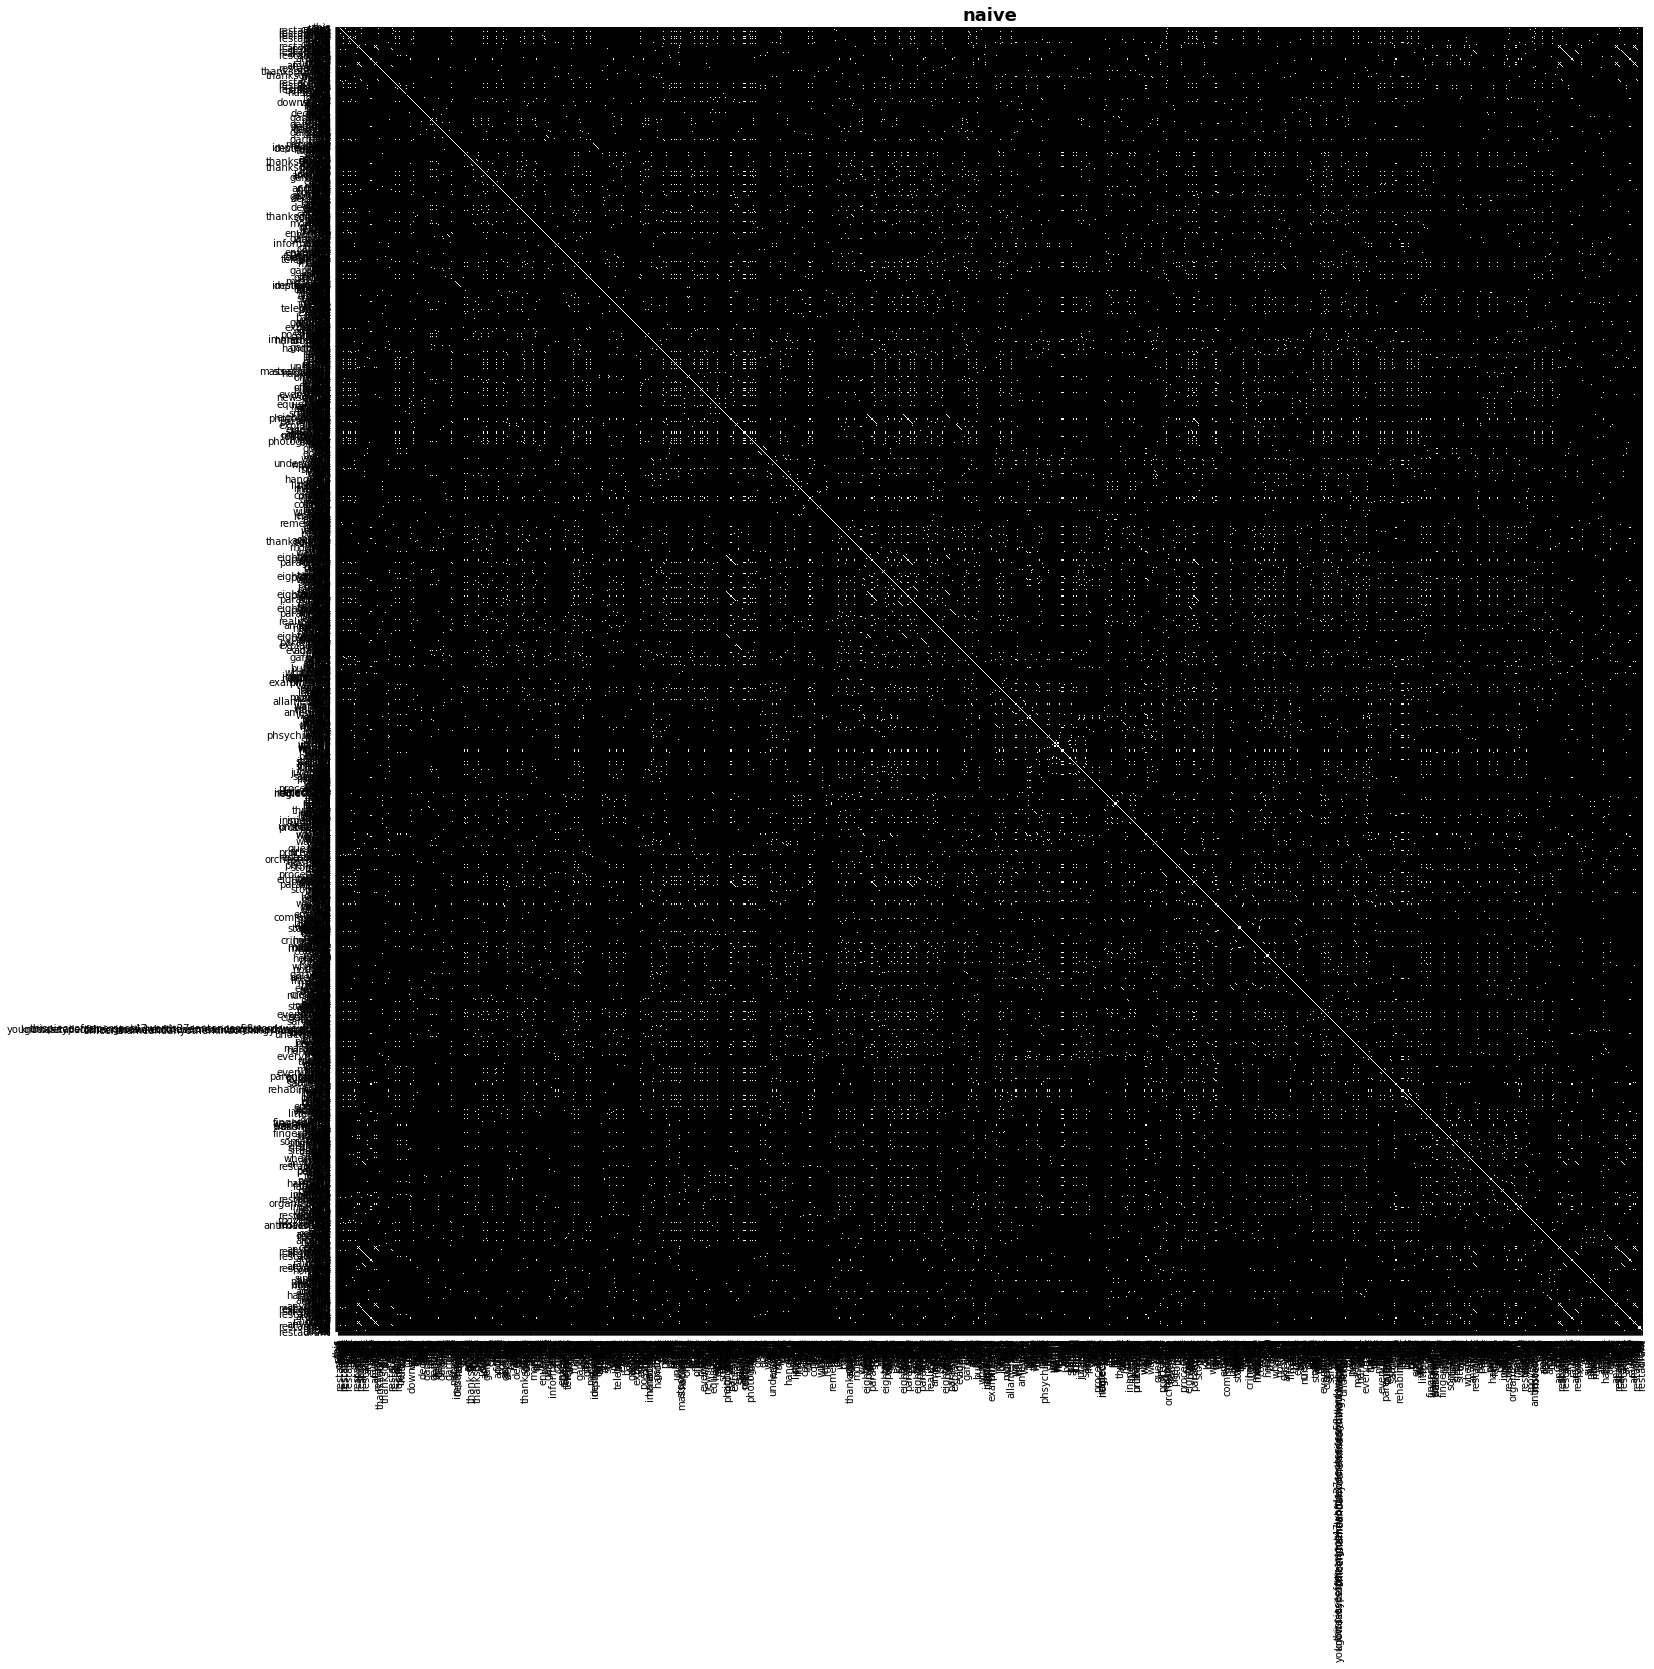

Error in callback <function flush_figures at 0x7fef2e5924c0> (for post_execute):


KeyboardInterrupt: 

In [78]:
def test_clever():
    lyrics = "alicesRestauraunt.txt"
    ll = read_lyrics_from_txt(lyrics)
    naive = naive_comparison(ll)
    clever = clever_comparison(ll)
    assert naive.all() == clever.all()
    visualize(ll, naive, "naive", False)
    visualize(ll, clever, "clever", False)
    
test_clever()

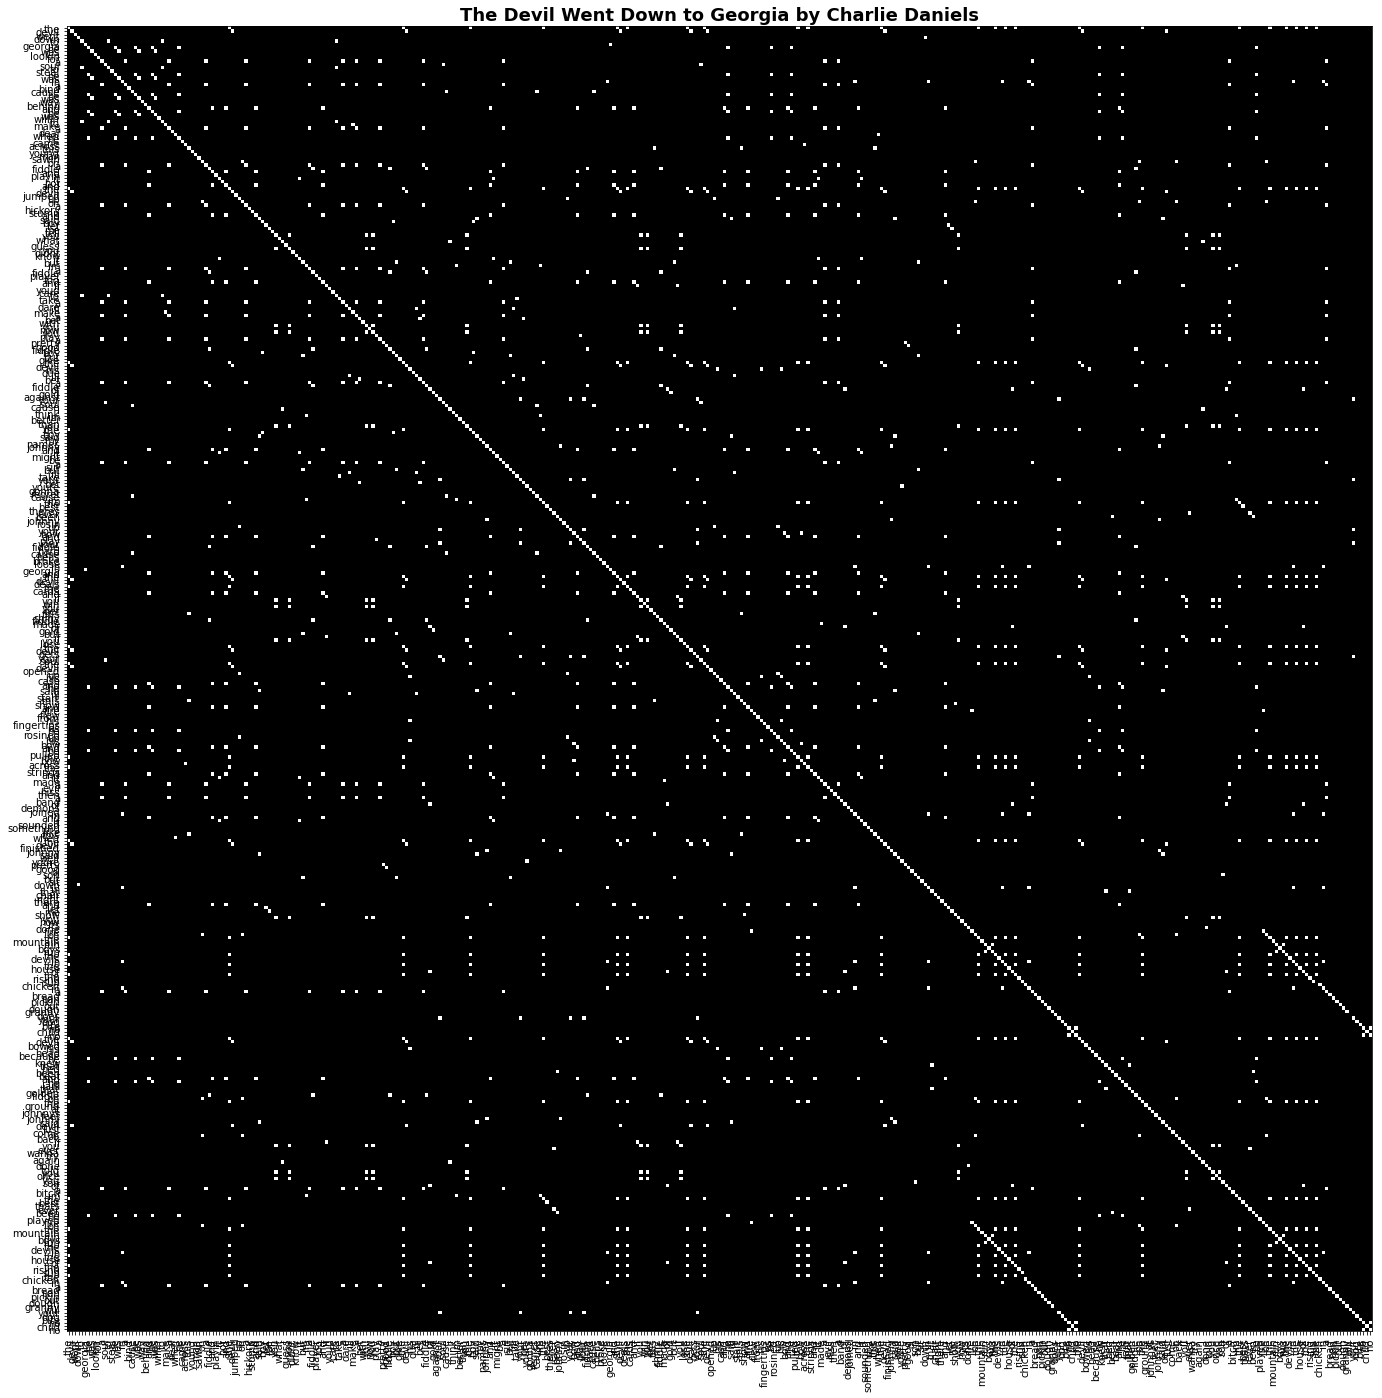

In [15]:
rr = read_lyrics_from_txt("devilwentdowntogeorgia.txt")
rr_grid = naive_comparison(rr)
visualize(rr, rr_grid,"The Devil Went Down to Georgia by Charlie Daniels")


### Improvement ideas

1. test clever comparison
2. point to pixel and tell me the word
3. auto-scale axes for length of song (or put every other word on each axis?)